# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(browser.html, 'html.parser')

In [5]:
# Extract all rows of data
all_rows = soup.find_all('tr', class_='data-row')
all_rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_list = []

# Loop through the scraped data to create a list of rows
for row in all_rows:
    # Get a list of 'td' per row
    all_td = row.find_all('td')

    # Create a dictionary to hold each row
    row_dict = dict()

    # Loop to populate the dictionary
    for idx, value in enumerate(all_td):
        row_dict[idx] = value.get_text()

    # Append the dictionary to the list
    mars_list.append(row_dict)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_list)

# Update the column headings to match the headings on the website
key_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df.columns = key_names

In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
int_cols = ['sol', 'ls', 'month']
float_cols = ['min_temp', 'pressure']

# Convert columns
mars_df[int_cols] = mars_df[int_cols].astype(int)
mars_df[float_cols] = mars_df[float_cols].astype(float)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = mars_df.groupby('month')['id'].count()
num_months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: id, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
martian_days = len(mars_df['terrestrial_date'].unique())
martian_days

1867

In [14]:
# 3. What is the average low temperature by month?
ave_low = mars_df.groupby('month')['min_temp'].mean()
ave_low

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

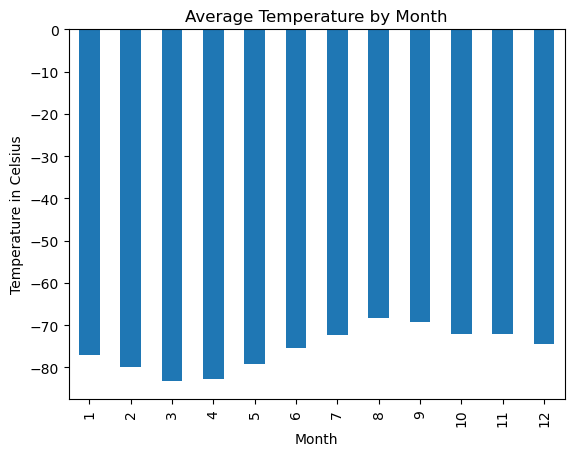

In [15]:
# Plot the average temperature by month
ave_low.plot(
    kind = 'bar',
    title = "Average Temperature by Month",
    xlabel = "Month",
    ylabel = "Temperature in Celsius")

plt.show()

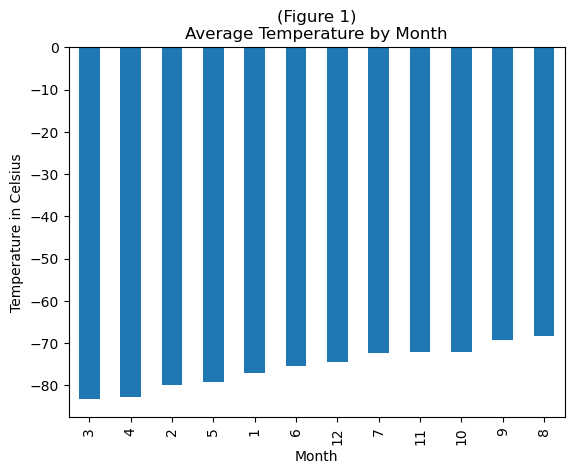

In [16]:
# Identify the coldest and hottest months in Curiosity's location
sorted_temps = ave_low.sort_values()

sorted_temps.plot(
    kind = 'bar',
    title = "(Figure 1)\nAverage Temperature by Month",
    xlabel = "Month",
    ylabel = "Temperature in Celsius")

plt.show()

In [17]:
# 4. Average pressure by Martian month
ave_pressure = mars_df.groupby('month')['pressure'].mean()
ave_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

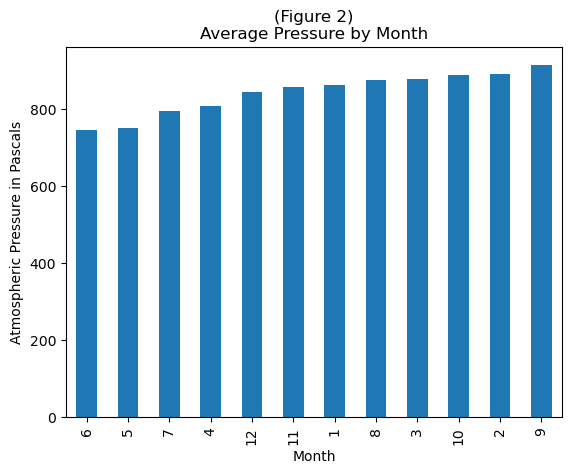

In [18]:
# Plot the average pressure by month
sorted_pressure = ave_pressure.sort_values()

sorted_pressure.plot(
    kind = 'bar',
    title = "(Figure 2)\nAverage Pressure by Month",
    xlabel = "Month",
    ylabel = "Atmospheric Pressure in Pascals")

plt.show()

640 days


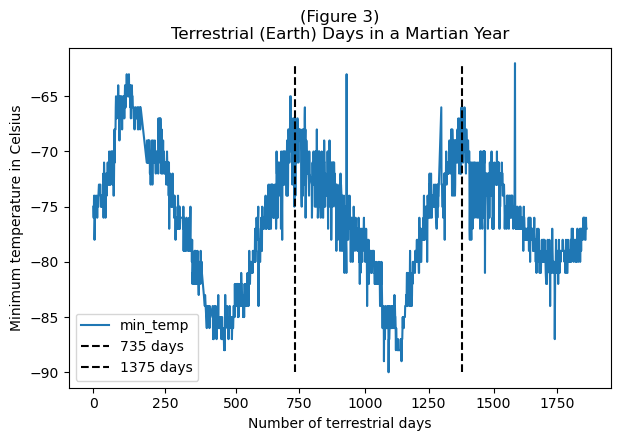

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Convert the datetime x-axis values to the number of days
step_size = 250
total_days = len(mars_df['terrestrial_date'].unique())

# Define the x-tick labels: [0, 250, ... 1750]
xtick_labels = [day for day in range(0, total_days, step_size)]

# Define the x-tick location for v-lines for visual estimation of stationary points
vline_labels = [735, 1375]

# Approximate peak-to-peak value given the vertical lines
print(f'{vline_labels[1] - vline_labels[0]} days')

# Define the corresponding x-tick location (datetime value)
xtick_location = []
vline_location = []
for idx, day in enumerate(mars_df['terrestrial_date']):
    for num in xtick_labels:
        if num == idx:
            xtick_location.append(day)
    for num in vline_labels:
        if num == idx:
            vline_location.append(day)

# Plot the line graph
line_plot = mars_df.plot(
    x = 'terrestrial_date',
    y = 'min_temp',
    title = "(Figure 3)\nTerrestrial (Earth) Days in a Martian Year",
    xlabel = "Number of terrestrial days",
    ylabel = "Minimum temperature in Celsius",
    xticks = xtick_location,
    figsize = (7,5))

# Fix the x-tick labels
line_plot.set_xticklabels(
    labels = xtick_labels,
    rotation_mode = 'default',
    rotation = 0,
    ha = 'center')

# Plot v-lines to assist visual estimation
for idx, line in enumerate(vline_location):
    line_plot.vlines(
        x = line,
        ymin = mars_df['min_temp'].min(),
        ymax = mars_df['min_temp'].max(),
        color = 'black',
        linestyle = '--',
        label = f'{vline_labels[idx]} days')

plt.legend(loc='lower left')
plt.show()

## Analysis Summary

### 1. How many months exist on Mars?

- There are __12__ months on Mars.

### 2. How many Martian days' worth of data are there?

- There are __1867__ Martian day's worth of data.

### 3. Which month, on average, has the lowest temperature? The highest?

- Figure 1 depicts the average low temperature by month.

- The __3rd month__ has the lowest average minimum, of __-83.3 degrees Celsius__.

- The __8th month__ has the highest average minimum, of __-68.4 degrees Celsius__.

### 4. Which month, on average, has the lowest atmospheric pressure? The highest?

- Figure 2 depicts the average atmospheric pressure by month.

- The __6th month__ has the lowest atmospheric pressure, of __745 Pascals__.

- The __9th month__ has the highest atmospheric pressure, of __913 Pascals__.

### 5. How many terrestrial days exist in a Martian year (visually estimate within 25%)?

- Figure 3 depicts the average minimum temperature plotted over the number of terrestrial days.

- To identify the number of terrestrial days in a Martian year, the peak is identified. Vertical lines at consecutive peaks are drawn to assist with the visual estimation - at the appriximate stationary point.

- Based on Figure 3, given the location of the vertical lines, there are __640 terrestrial days__ in a Martian year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_data.csv', index=False, header=True)

In [21]:
browser.quit()